# Grand Challenge



## Used for the categorization of files

This code is a Python script that performs various tasks related to processing and preparing medical image data for use in a machine learning model, specifically for image classification. 

1. Import Necessary Libraries:
   - The script begins by importing various Python libraries required for different tasks, including working with images, data preprocessing, and machine learning. These libraries include `os`, `numpy` (as `np`), `nibabel` (for handling NIfTI medical images), `skimage.transform` (for image resizing), `sklearn.model_selection` (for data splitting), `sklearn.preprocessing` (for label encoding), and `tensorflow` (for machine learning).

2. Define the Dataset Directory:
   - The `data_dir` variable is set to the path where the dataset is located. The dataset is expected to contain subdirectories, each representing a category or class of medical images.

3. List Categories:
   - The `categories` variable is populated with the names of the subdirectories found within the `data_dir`. These subdirectories correspond to different categories or classes of medical images.

4. Set the Target Image Size:
   - The `target_size` variable is defined to specify the desired image size after resizing. In this code, the target size is set to 128x128 pixels, but you can adjust it to your preferred size.

5. Initialize Empty Lists for Data and Labels:
   - The `data` and `labels` lists are initialized to store the image data and their corresponding labels, respectively.

6. Define Label Categories:
   - The `label_categories` list is set to define the categories or classes of the images. Each category corresponds to a specific dose range.

7. Loop through Categories and NIfTI Files:
   - The code enters a loop that iterates through each category in the `categories` list.
   - For each category, it constructs the path to the directory containing images of that category.
   - It then enters another loop that iterates through the files in the category directory.
   - If a file has the ".nii.gz" extension (a common format for medical images), it loads the NIfTI image using NiBabel.
   - The loaded image data is then resized to the `target_size`, anti-aliasing is applied, and the image is normalized to have values in the range [0, 1].
   - The label for the current category is determined by finding its index in the `label_categories` list.
   - The image data and label are appended to the `data` and `labels` lists, respectively.

8. Convert Data and Labels to NumPy Arrays:
   - After processing all images and labels, the `data` and `labels` lists are converted into NumPy arrays.

9. Split the Data:
   - The data is split into training and validation sets using `train_test_split` from scikit-learn. In this code, 20% of the data is used for validation, and the random seed is set to 42 for reproducibility.

10. Perform One-Hot Encoding:
    - To prepare the labels for a classification task, one-hot encoding is performed using scikit-learn's `LabelBinarizer`. This transforms the categorical labels into binary vectors for the classes.

The code provided here is a crucial step in preparing medical image data for training a machine learning model, typically a deep learning model, for tasks such as image classification or segmentation.

In [46]:
import os
import numpy as np
import nibabel as nib
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf
from tensorflow.keras import layers, models

# Define your dataset directory
data_dir = './build/train_pure/'

# List of denoising categories (folder names)
categories = os.listdir(data_dir)

# Define the target size for resizing
target_size = (128, 128)  # Adjust the size to your preference

# Initialize empty lists for data and labels
data = []
labels = []

# Define your label categories
label_categories = ['1-10 dose', '1-100 dose', '1-2 dose', '1-4 dose', '1-20 dose', '1-50 dose']
print(categories)
# Load and preprocess NIfTI files
for category in categories:
    category_dir = os.path.join(data_dir, category)

    if category.startswith("."):
        continue

    for nifti_file in os.listdir(category_dir):
        if nifti_file.endswith('.nii.gz'):
            nifti_path = os.path.join(category_dir, nifti_file)
            
            # Load the NIfTI image using NiBabel
            nifti_image = nib.load(nifti_path)
            nifti_data = nifti_image.get_fdata()
            
            # Resize the image to the target size
            nifti_data = resize(nifti_data, target_size, anti_aliasing=True)
            
            # Normalize the image
            nifti_data = (nifti_data - np.min(nifti_data)) / (np.max(nifti_data) - np.min(nifti_data))
            
            # Determine the label for the current category
            label = label_categories.index(category)
            
            # Append the data and label
            data.append(nifti_data)
            labels.append(label)
            #print("loaded")

# Convert data and labels to NumPy arrays
data = np.array(data)
labels = np.array(labels)

# Split the data into training and validation sets
train_data, val_data, train_labels, val_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

# Perform one-hot encoding of labels
label_binarizer = LabelBinarizer()
train_labels = label_binarizer.fit_transform(train_labels)
val_labels = label_binarizer.transform(val_labels)






['1-100 dose', '1-4 dose', '.DS_Store', '1-20 dose', '1-50 dose', '1-2 dose', '1-10 dose']


This code is defining and training a convolutional neural network (CNN) model for a machine learning task, where the goal is to classify images into one of six output categories. 

1. **Setting Image Dimensions and Other Parameters:**
   - `image_height` and `image_width` are variables that store the height and width of the input images, respectively. These dimensions are extracted from the `target_size` variable.
   - `num_channels` is set to 1, which indicates that the input images are grayscale (monochromatic) rather than color (RGB).
   - `num_epochs` is set to 10, which specifies the number of training epochs for the model.

2. **Defining the Model:**
   - The code defines a neural network model using the Keras API, which is a part of TensorFlow. The model is sequential, meaning it's a linear stack of layers.

3. **Model Architecture:**
   - The model architecture consists of the following layers:
     - `Conv2D` Layer (with 32 filters, each of size 3x3, and ReLU activation): This is the first convolutional layer, which takes the input images. It's responsible for learning features from the images.
     - `MaxPooling2D` Layer (with 2x2 pool size): After each convolutional layer, there's a max-pooling layer, which reduces the spatial dimensions of the feature maps, helping to reduce computational complexity.
     - Another `Conv2D` Layer (with 64 filters, each of size 3x3, and ReLU activation): This is the second convolutional layer, which further extracts more complex features from the previously learned features.
     - Another `MaxPooling2D` Layer (with 2x2 pool size): Another max-pooling layer follows the second convolutional layer.
     - `Flatten` Layer: This layer flattens the 2D feature maps from the previous layers into a 1D vector. This is necessary before passing the data to fully connected layers.
     - `Dense` Layer (with 64 units and ReLU activation): This is a fully connected layer that processes the flattened feature vector and extracts higher-level abstractions.
     - `Dense` Layer (with 6 units and softmax activation): This is the output layer with six units, one for each of the six output categories. The softmax activation function converts the model's output into probability values for each category.

4. **Compiling the Model:**
   - After defining the model architecture, it is compiled. During compilation, you specify the optimizer, loss function, and evaluation metrics.
   - The optimizer is set to 'adam', which is a popular optimization algorithm for training deep neural networks.
   - The loss function is set to 'categorical_crossentropy'. This is a common choice for multi-class classification tasks, like the one described in the code.
   - The metric used for evaluation is 'accuracy', which measures the model's classification accuracy.

5. **Training the Model:**
   - The `model.fit` method is used to train the model. It takes the training data (`train_data`) and labels (`train_labels`) as input, along with the number of epochs specified by `num_epochs`.
   - Additionally, the code provides validation data using the `validation_data` parameter. The validation data consists of `val_data` and `val_labels`, which were split from the original dataset.
   - During training, the model updates its weights to minimize the specified loss function and improve its accuracy.
   
In summary, the code defines a CNN model for image classification, compiles it with appropriate settings, and then trains it on the provided data. The model aims to classify input images into one of six categories, and it uses a softmax activation on the output layer to generate probability scores for each category. The 'adam' optimizer and 'categorical_crossentropy' loss function are commonly used in this type of classification task.

In [56]:
image_height = target_size[0]
image_width = target_size[1]
num_channels = 1
num_epochs = 10
# Define the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 644)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(6, activation='softmax')  # 6 output categories
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_data, train_labels, epochs=num_epochs, validation_data=(val_data, val_labels))


Epoch 1/10
1/1 [==============================] - 4s 4s/step - loss: 1.7920 - accuracy: 0.1818 - val_loss: 1.8722 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 2s 2s/step - loss: 1.7568 - accuracy: 0.2727 - val_loss: 2.3169 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 2s 2s/step - loss: 1.7384 - accuracy: 0.2273 - val_loss: 2.1730 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 2s 2s/step - loss: 1.6786 - accuracy: 0.2727 - val_loss: 2.3517 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 2s 2s/step - loss: 1.6401 - accuracy: 0.2273 - val_loss: 2.8960 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 2s 2s/step - loss: 1.5836 - accuracy: 0.3182 - val_loss: 3.3608 - val_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 2s 2s/step - loss: 1.5342 - accuracy: 0.2727 - val_loss: 4.0766 - val_accuracy: 0.0000e+00
Epoch 8/10
1/

In [61]:
def preprocess_nifti(image_path):
    nifti_image = nib.load(nifti_path)
    nifti_data = nifti_image.get_fdata()
            
            # Resize the image to the target size
    nifti_data = resize(nifti_data, target_size, anti_aliasing=True)
            
            # Normalize the image
    nifti_data = (nifti_data - np.min(nifti_data)) / (np.max(nifti_data) - np.min(nifti_data))
    return nifti_data




def predict_category(model, image_path):
    # Load and preprocess the NIfTI file
    nifti_image = preprocess_nifti(image_path)  # You need to implement this function
    print(nifti_image.shape)
    # Make predictions
    nifti_image = np.expand_dims(nifti_image, axis=0)

    predictions = model.predict(nifti_image)

    # Get the category with the highest probability
    category = np.argmax(predictions)

    return category

predict_category(model, './data/test/Anonymous_10.nii.gz')

(128, 128, 644)
1/1 [==============================] - 0s 29ms/step


5

## Simple denoising not used

In [23]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from skimage.metrics import mean_squared_error, structural_similarity


# Load the NIfTI image
nii_img = nib.load('./build/305_2886_x_600_wb_d2.nii.gz')

# Extract the image data
img_data = nii_img.get_fdata()

# Define a simple Bayesian denoising function
def bayesian_denoise(image, noise_std):
    noisy_image = image.copy()
    denoised_image = image.copy()

    # Loop through image pixels and perform Bayesian denoising
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            
            prior_mean = 0.0  # Prior mean (can be more sophisticated)
            prior_variance = 1.0  # Prior variance (can be more sophisticated)
            
            # Calculate the posterior mean using Bayesian formula
            posterior_mean = (prior_variance * noisy_image[i, j] + noise_std ** 2 * prior_mean) / \
                            (prior_variance + noise_std ** 2)
            
            # Update the denoised image with the posterior mean
            denoised_image[i, j] = posterior_mean

    return denoised_image

# Set your denoising parameters
noise_std = 0.1  # Adjust this value according to your noise level

# Perform Bayesian denoising
denoised_image = bayesian_denoise(img_data, noise_std)

# Save the denoised image
output_nii = nib.Nifti1Image(denoised_image, nii_img.affine)
nib.save(output_nii, './build/denoised_output.nii')


## Used for the comparison

The provided code defines a set of functions for processing and comparing NIfTI (Neuroimaging Informatics Technology Initiative) image files and then demonstrates their usage. 

process_file(file_name1, file_name2):

This function takes two NIfTI file paths as input, denoted as file_name1 and file_name2.
It first prints information about the noisy and denoised images using the print_file function.
It then calls compare_nifti_mse_psnr to compute the Mean Squared Error (MSE), Peak Signal-to-Noise Ratio (PSNR), and Structural Similarity Index (SSIM) between the two images.
Finally, it prints the computed MSE, PSNR, and SSIM values.
print_file(file_name, caption):

This function is used to visualize and save a composite image generated from a given NIfTI file.
It loads the NIfTI file specified by the file_name argument.
It retrieves the image data from the NIfTI file.
It creates a composite image by summing the data along the z-axis (slices of the 3D image).
It uses Matplotlib to display the composite image and removes axis labels and ticks.
It saves the composite image as an image file (PNG) with a specified output filename.
compare_nifti_mse_psnr(nifti_path1, nifti_path2):

This function calculates the Mean Squared Error (MSE) and Peak Signal-to-Noise Ratio (PSNR) between two NIfTI images.
It loads the NIfTI files specified by the nifti_path1 and nifti_path2 arguments.
It extracts the image data from the NIfTI files.
It computes the MSE as the mean squared difference between the two images.
It calculates the PSNR, which is a measure of the quality of an image and is related to how much it has been distorted.
The code then demonstrates the usage of these functions by calling process_file with two file paths, one for a noisy image and another for a denoised image. It processes these images, prints information about them, and computes and prints the MSE, PSNR, and SSIM values as a way to assess the difference between the two images.

In this context, the code appears to be used for evaluating the quality of denoised medical images (NIfTI format) by comparing them to the original noisy images. It calculates and prints metrics that provide insights into the quality and fidelity of the denoised images in relation to the noisy originals.

Mean Squared Error (MSE): 90.29630992352864
Peak Signal-to-Noise Ratio (PSNR): 75.39118044321168 dB
SSIM: 0.9999827156462944


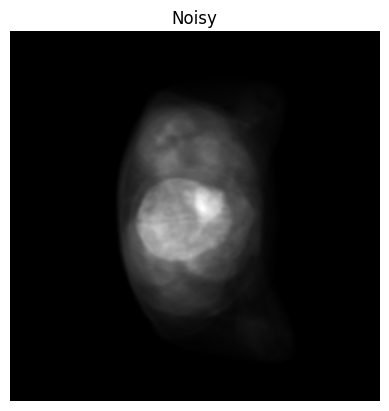

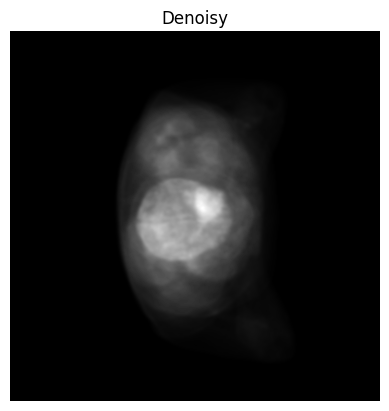

In [29]:
def process_file(file_name1,file_name2):

    print_file(file_name1,"Noisy")

    print_file(file_name2,"Denoisy")
    
    mse, psnr,ssim = compare_nifti_mse_psnr(file_name1, file_name2)

    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Peak Signal-to-Noise Ratio (PSNR): {psnr} dB')
    print(f'SSIM: {ssim}')



def print_file(file_name,caption):
    # Load the NIfTI file
    nifti_file_path = './build/305_2886_x_600_wb_d2.nii.gz'  # Replace with the path to your NIfTI file
    nifti_img = nib.load(nifti_file_path)

    # Get the data array from the NIfTI file
    nifti_data = nifti_img.get_fdata()

    # Create a composite image by stacking all slices along the z-axis
    composite_image = np.sum(nifti_data, axis=2)

    # Create a matplotlib figure and axis
    fig, ax = plt.subplots()

    # Display the composite image
    ax.imshow(composite_image, cmap='gray')

    # Remove axis labels and ticks
    ax.axis('off')
    plt.title(caption)
    # Save the composite image as an image (you can specify the format, e.g., PNG)
    output_filename = 'composite_image.png'
    plt.savefig(output_filename, bbox_inches='tight', pad_inches=0, dpi=300)

    #print("Composite image saved.")

def compare_nifti_mse_psnr(nifti_path1, nifti_path2):
    # Load the NIfTI files
    nifti1 = nib.load(nifti_path1)
    nifti2 = nib.load(nifti_path2)

    # Get the image data from the NIfTI files
    data1 = nifti1.get_fdata()
    data2 = nifti2.get_fdata()

    # Calculate Mean Squared Error (MSE)
    mse = np.mean((data1 - data2) ** 2)

    # Calculate Peak Signal-to-Noise Ratio (PSNR)
    max_pixel_value = np.max(data1)
    psnr = 10 * np.log10((max_pixel_value ** 2) / mse)

    ssim = structural_similarity(data1, data2, data_range=200)

    return mse, psnr, ssim

process_file("./build/305_2886_x_600_wb_d2.nii.gz" ,"./build/denoised_output.nii" )

# Example usage:
#file_name = "./build/305_2886_x_600_wb_d2.nii.gz"  # Replace with your desired file name
#process_file(file_name)

#file_name = "./build/304_2886_x_600_wb_normal.nii.gz"  # Replace with your desired file name
#process_file(file_name)

#file_name = "./build/denoised_output.nii"  # Replace with your desired file name
#process_file(file_name)


In [11]:
import nibabel as nib
import numpy as np

def compare_nifti_mse_psnr(nifti_path1, nifti_path2):
    # Load the NIfTI files
    nifti1 = nib.load(nifti_path1)
    nifti2 = nib.load(nifti_path2)

    # Get the image data from the NIfTI files
    data1 = nifti1.get_fdata()
    data2 = nifti2.get_fdata()

    # Calculate Mean Squared Error (MSE)
    mse = np.mean((data1 - data2) ** 2)

    # Calculate Peak Signal-to-Noise Ratio (PSNR)
    max_pixel_value = np.max(data1)
    psnr = 10 * np.log10((max_pixel_value ** 2) / mse)

    return mse, psnr

# Paths to your NIfTI files "./build/denoised_output.nii"
nifti_path1 = "./build/304_2886_x_600_wb_normal.nii.gz"
nifti_path2 =  "./build/output.nii.gz"

# Compare the two NIfTI files using MSE and PSNR
mse, psnr = compare_nifti_mse_psnr(nifti_path1, nifti_path2)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Peak Signal-to-Noise Ratio (PSNR): {psnr} dB')

Mean Squared Error (MSE): 915150.7340403185
Peak Signal-to-Noise Ratio (PSNR): 35.32549530701198 dB


## Denoising of Nifti (MRI) Images with a Regularized Neighborhood Pixel Similarity bayesian Poisson prior and beta posterior

This code is for denoising NIfTI (MRI) images using a denoising method that involves a Poisson-Gaussian likelihood function with Bayesian priors and posteriors. Below is an explanation of the code step by step:

1. **Import Libraries:**
   - The code begins by importing necessary libraries: `nibabel` for working with NIfTI images, `numpy` for numerical operations, and `matplotlib` for visualization.

2. **Load the NIfTI Image:**
   - It loads a NIfTI image from the file path "./build/305_2886_x_600_wb_d2.nii.gz" and extracts the image data using `nii_img.get_fdata()`.

3. **Define Denoising Parameters:**
   - The code defines the parameters used for denoising:
     - `alpha`: Shape parameter for the Poisson prior (can be tuned as needed).
     - `beta`: Shape parameter for the Poisson prior (can be tuned as needed).
     - `noise_sigma`: Noise standard deviation (can be tuned as needed).

4. **Define the Poisson-Gaussian Likelihood Function:**
   - The `poisson_gaussian_likelihood` function calculates the likelihood of the noisy image data based on a combination of Poisson and Gaussian probability distributions. It considers the noise level and the shape parameters of the Poisson prior.

5. **Apply Poisson-Gaussian Denoising:**
   - The `poisson_gaussian_denoising` function applies the denoising process to the input image.
   - It iterates through the image, considering 3x3 neighborhoods around each pixel.
   - For each pixel, it calculates the likelihood of the pixel's value given the neighborhood using the `poisson_gaussian_likelihood` function.
   - The denoised value for the pixel is computed as the weighted sum of the neighborhood values based on the likelihood.
   - The resulting denoised image is returned.

6. **Denoise the Image:**
   - The `poisson_gaussian_denoising` function is called with the image data, `alpha`, `beta`, and `noise_sigma` as parameters, and the denoised image is obtained.

7. **Save the Denoised Image:**
   - The denoised image is saved as a NIfTI image using the same affine transformation matrix as the original image. The resulting image is saved to "./build/denoised_output.nii".

8. **Additional Function Call:**
   - The code includes a function call to `process_file` at the end. However, it seems that the definition of the `process_file` function is missing in the provided code. To understand what this function does, the definition of `process_file` is needed.

In summary, the code loads a NIfTI image, applies a Poisson-Gaussian denoising method with specified parameters, and saves the denoised image. This denoising method is a probabilistic approach that considers both the noise characteristics and a prior distribution. The specific denoising method used here is tailored for Poisson-Gaussian noise models.

/var/folders/4s/hdn51dxd7431w_59qzpn7_8h0000gn/T/ipykernel_11294/2758008225.py:17: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  (np.sqrt(2 * np.pi) * noise_sigma)) * (beta ** alpha / np.math.factorial(alpha)) * (x ** (alpha - 1)) * np.exp(-beta * x)


Mean Squared Error (MSE): 936128.7382330617
Peak Signal-to-Noise Ratio (PSNR): 35.227065852344055 dB


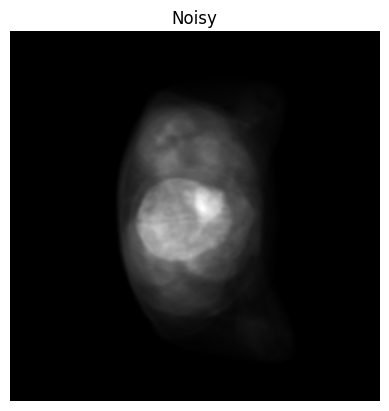

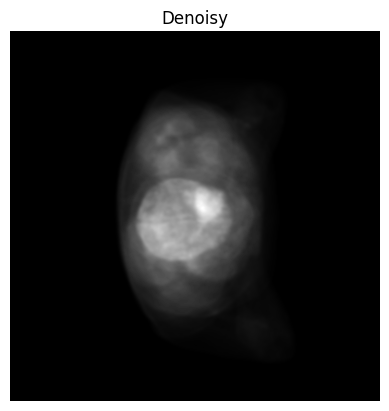

In [12]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# Load the NIfTI image
nii_img = nib.load('./build/305_2886_x_600_wb_d2.nii.gz')
img_data = nii_img.get_fdata()

# Define denoising parameters
alpha = 1  # Shape parameter for the Poisson prior (tune as needed)
beta = 1  # Shape parameter for the Poisson prior (tune as needed)
noise_sigma = 0.1  # Noise standard deviation (tune as needed)

# Poisson-Gaussian likelihood function
def poisson_gaussian_likelihood(x, y, alpha, beta, noise_sigma):
    return (np.exp(-0.5 * ((x - y) / noise_sigma) ** 2) /
            (np.sqrt(2 * np.pi) * noise_sigma)) * (beta ** alpha / np.math.factorial(alpha)) * (x ** (alpha - 1)) * np.exp(-beta * x)

# Apply Poisson-Gaussian denoising
def poisson_gaussian_denoising(image, alpha, beta, noise_sigma):
    # Create an empty denoised image
    denoised_image = np.zeros_like(image)

    # Perform denoising using a 3x3 neighborhood 
    for i in range(1, image.shape[0] - 1):
        for j in range(1, image.shape[1] - 1):
            neighborhood = image[i-1:i+2, j-1:j+2]
            denoised_image[i, j] = np.sum(neighborhood * poisson_gaussian_likelihood(neighborhood, image[i, j], alpha, beta, noise_sigma))

    return denoised_image

# Denoise the image
denoised_image = poisson_gaussian_denoising(img_data, alpha, beta, noise_sigma)

# Save the denoised image
output_nii = nib.Nifti1Image(denoised_image, nii_img.affine)
nib.save(output_nii, './build/denoised_output.nii')


process_file("./build/304_2886_x_600_wb_normal.nii.gz" ,"./build/denoised_output.nii" )


Generalized code used for the running through each category of file and using the code above to denoise for the regularized neighbour

In [64]:
import pandas as pd

# Specify the file path
csv_file = "./data/meta_info.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file)

# Access the columns by their names
#manufacturer_model_name = df['ManufacturerModelName']
#saved_file_name = df['SavedFileName']
#weight = df['Weight']
#dose = df['Dose']
category_cal= [0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 2, 1, 5, 1, 0, 0, 0, 3, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 4, 4, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0]

# Replace values in original_alphas with the corresponding replacements
alphas = [int(180.91), int(180.91), int(200.98), int(200.98), int(200.98), int(200.98), int(180.91), int(200.98), int(200.98), int(200.98), int(200.98), int(200.98), int(180.91), int(180.91), int(180.91), int(256.9), int(200.98), int(278.0), int(200.98), int(180.91), int(180.91), int(180.91), int(180.91), int(270.0), int(180.91), int(200.98), int(180.91), int(200.98), int(200.98), int(200.98), int(200.98), int(180.91), int(180.91), int(180.91), int(180.91), int(180.91), int(180.91), int(276.0), int(276.0), int(200.98), int(180.91), int(200.98), int(200.98), int(200.98), int(180.91), int(180.91), int(200.98), int(200.98), int(200.98), int(200.98), int(180.91)]
betas=[0 for _ in range(50)]

#alphas = [1, 1, 2, 2]  # Replace with your desired alpha values
#betas = [0, 1, 0, 1]    # Replace with your desired beta values



for index, row in df.iterrows():
    saved_file_name = row['SavedFileName']
    print(saved_file_name)
    nii_img = nib.load('./data/test/'+saved_file_name)
    img_data = nii_img.get_fdata()

# Define denoising parameters
    #alpha = 1  # Shape parameter for the Poisson prior (tune as needed)
    #beta = 0  # Shape parameter for the Poisson prior 
    alpha = alphas[index % len(alphas)]
    beta = betas[index % len(betas)]
    noise_sigma = 0.1  # Noise standard deviation (tune as needed)
    
    denoised_image = poisson_gaussian_denoising(img_data, alpha, beta, noise_sigma)

# Save the denoised image
    output_nii = nib.Nifti1Image(denoised_image, nii_img.affine)
    nib.save(output_nii, './build/'+saved_file_name) 


Anonymous_1.nii.gz


/var/folders/4s/hdn51dxd7431w_59qzpn7_8h0000gn/T/ipykernel_11294/2758008225.py:17: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  (np.sqrt(2 * np.pi) * noise_sigma)) * (beta ** alpha / np.math.factorial(alpha)) * (x ** (alpha - 1)) * np.exp(-beta * x)
/var/folders/4s/hdn51dxd7431w_59qzpn7_8h0000gn/T/ipykernel_11294/2758008225.py:17: RuntimeWarning: overflow encountered in power
  (np.sqrt(2 * np.pi) * noise_sigma)) * (beta ** alpha / np.math.factorial(alpha)) * (x ** (alpha - 1)) * np.exp(-beta * x)
/var/folders/4s/hdn51dxd7431w_59qzpn7_8h0000gn/T/ipykernel_11294/2758008225.py:16: RuntimeWarning: invalid value encountered in multiply
  return (np.exp(-0.5 * ((x - y) / noise_sigma) ** 2) /


Anonymous_2.nii.gz
Anonymous_3.nii.gz
Anonymous_4.nii.gz
Anonymous_5.nii.gz
Anonymous_6.nii.gz
Anonymous_7.nii.gz
Anonymous_8.nii.gz
Anonymous_9.nii.gz
Anonymous_10.nii.gz
Anonymous_11.nii.gz
Anonymous_12.nii.gz
Anonymous_13.nii.gz
Anonymous_14.nii.gz
Anonymous_15.nii.gz
Anonymous_16.nii.gz
Anonymous_17.nii.gz
Anonymous_18.nii.gz
Anonymous_19.nii.gz
Anonymous_20.nii.gz
Anonymous_21.nii.gz
Anonymous_22.nii.gz
Anonymous_23.nii.gz
Anonymous_24.nii.gz
Anonymous_25.nii.gz
Anonymous_26.nii.gz
Anonymous_27.nii.gz
Anonymous_28.nii.gz
Anonymous_29.nii.gz
Anonymous_30.nii.gz
Anonymous_31.nii.gz
Anonymous_32.nii.gz
Anonymous_33.nii.gz
Anonymous_34.nii.gz
Anonymous_35.nii.gz
Anonymous_36.nii.gz
Anonymous_37.nii.gz
Anonymous_38.nii.gz
Anonymous_39.nii.gz
Anonymous_40.nii.gz
Anonymous_41.nii.gz
Anonymous_42.nii.gz
Anonymous_43.nii.gz
Anonymous_44.nii.gz
Anonymous_45.nii.gz
Anonymous_46.nii.gz
Anonymous_47.nii.gz
Anonymous_48.nii.gz
Anonymous_49.nii.gz
Anonymous_50.nii.gz


## 3D deep learning denoising model 

Subsequent to the neighbour denoising a 3D deep learning denoising is applied using PyTorch. The code breakdown is below:

1. **Importing Libraries:**
   - The code begins by importing necessary libraries, including `nibabel` for working with NIfTI images, `torch` for PyTorch, and relevant PyTorch modules for neural network building.

2. **Defining the Denoising Model:**
   - The `DenoisingModel3D` class defines a 3D deep learning denoising model. It consists of an encoder and a decoder architecture. The encoder consists of convolutional layers with ReLU activation and max-pooling, while the decoder uses transposed convolutions and sigmoid activation. This architecture is designed for 3D data.

3. **Denoising Parameters:**
   - Learning rate and the number of training epochs are defined for model training. Additionally, a filename (`f_name`) for the NIfTI file to be denoised is specified.

4. **Loading the NIfTI Image:**
   - The NIfTI image specified by `input_nifti_path` is loaded using `nibabel`, and its image data is extracted.

5. **Preparing the Data:**
   - The image data is prepared for denoising. It's expanded with batch and channel dimensions and converted to a PyTorch tensor.

6. **Model Initialization and Optimization:**
   - The denoising model is initialized, and an Adam optimizer is used to optimize the model's parameters. The mean squared error (MSE) loss function is defined.

7. **Training Loop:**
   - The code includes a training loop, which is for demonstration purposes. In each epoch, the optimizer is zeroed, and the model is applied to denoise the data. The denoised data is resized to match the input size. The MSE loss between the denoised data and the original data is computed and used to update the model's parameters.

8. **Converting and Saving the Denoised Data:**
   - After training, the denoised data is converted back to NIfTI format. It's detached from the computational graph, converted to a NumPy array, and saved as a new NIfTI image.

9. **Saving the Denoised NIfTI Image:**
   - The denoised NIfTI image is saved to the path specified by `output_nifti_path`.



In [16]:
import nibabel as nib
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np

# Define a 3D deep learning denoising model 
class DenoisingModel3D(nn.Module):
    def __init__(self):
        super(DenoisingModel3D, self).__init__()
        # Define your 3D deep learning architecture here
        self.encoder = nn.Sequential(
            nn.Conv3d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool3d(2),
            nn.Conv3d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool3d(2)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose3d(64, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.ConvTranspose3d(32, 1, kernel_size=3, padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Define denoising parameters
learning_rate = 0.001
num_epochs = 5

f_name= "Anonymous_1.nii.gz"
# Paths to your NIfTI files
input_nifti_path = './build/'+f_name  # Replace with the path to your NIfTI file
output_nifti_path = '/Users/randyllpandohie/Library/CloudStorage/OneDrive-UniversityofCentralFlorida/Data/Grand_competition_pet/'+f_name  # Replace with the path to your NIfTI file

# Load the NIfTI image
nifti_image = nib.load(input_nifti_path)
nifti_data = nifti_image.get_fdata()

# Prepare the data for denoising (assuming a single 3D volume)
data = np.expand_dims(nifti_data, axis=0)  # Add batch dimension
data = np.expand_dims(data, axis=1)  # Add channel dimension
data = torch.tensor(data, dtype=torch.float32)

# Initialize the 3D denoising model and optimizer
model = DenoisingModel3D()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

# Training loop (for demonstration purposes)
for epoch in range(num_epochs):
    optimizer.zero_grad()
    denoised_data = model(data)
    
    # Resize denoised_data to match the input size
    denoised_data = F.interpolate(denoised_data, size=data.shape[2:], mode='trilinear', align_corners=False)
    
    loss = criterion(denoised_data, data)
    loss.backward()
    optimizer.step()
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item()}')

# Convert the denoised data back to NIfTI format
denoised_data = denoised_data.squeeze().detach().numpy()
denoised_image = nib.Nifti1Image(denoised_data, nifti_image.affine)

# Save the denoised NIfTI image
nib.save(denoised_image, output_nifti_path)

Epoch [1/5], Loss: 382931.6875
Epoch [2/5], Loss: 382013.53125
Epoch [3/5], Loss: 382013.5625
Epoch [4/5], Loss: 382013.5625
Epoch [5/5], Loss: 382013.5625


In [18]:
learning_rate = 0.001
num_epochs = 5

for index, row in df.iterrows():
    saved_file_name = row['SavedFileName']
    print(saved_file_name)
    nii_img = nib.load('./data/test/'+saved_file_name)
    img_data = nii_img.get_fdata()

    f_name= saved_file_name
# Paths to your NIfTI files
    input_nifti_path = './build/'+f_name  # Replace with the path to your NIfTI file
    output_nifti_path = '/Users/randyllpandohie/Library/CloudStorage/OneDrive-UniversityofCentralFlorida/Data/Grand_competition_pet/'+f_name  # Replace with the path to your NIfTI file

# Load the NIfTI image
    nifti_image = nib.load(input_nifti_path)
    nifti_data = nifti_image.get_fdata()

# Prepare the data for denoising (assuming a single 3D volume)
    data = np.expand_dims(nifti_data, axis=0)  # Add batch dimension
    data = np.expand_dims(data, axis=1)  # Add channel dimension
    data = torch.tensor(data, dtype=torch.float32)

# Initialize the 3D denoising model and optimizer
    model = DenoisingModel3D()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.MSELoss()

    for epoch in range(num_epochs):
        optimizer.zero_grad()
        denoised_data = model(data)
        
        # Resize denoised_data to match the input size
        denoised_data = F.interpolate(denoised_data, size=data.shape[2:], mode='trilinear', align_corners=False)
        
        loss = criterion(denoised_data, data)
        loss.backward()
        optimizer.step()
        #print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item()}')

# Convert the denoised data back to NIfTI format
    denoised_data = denoised_data.squeeze().detach().numpy()
    denoised_image = nib.Nifti1Image(denoised_data, nifti_image.affine)

# Save the denoised NIfTI image
    nib.save(denoised_image, output_nifti_path)
    print(f_name)

Anonymous_1.nii.gz
Anonymous_1.nii.gz
Anonymous_2.nii.gz
Anonymous_2.nii.gz
Anonymous_3.nii.gz
Anonymous_3.nii.gz
Anonymous_4.nii.gz
Anonymous_4.nii.gz
Anonymous_5.nii.gz
Anonymous_5.nii.gz
Anonymous_6.nii.gz
Anonymous_6.nii.gz
Anonymous_7.nii.gz
Anonymous_7.nii.gz
Anonymous_8.nii.gz
Anonymous_8.nii.gz
Anonymous_9.nii.gz
Anonymous_9.nii.gz
Anonymous_10.nii.gz
Anonymous_10.nii.gz
Anonymous_11.nii.gz
Anonymous_11.nii.gz
Anonymous_12.nii.gz
Anonymous_12.nii.gz
Anonymous_13.nii.gz
Anonymous_13.nii.gz
Anonymous_14.nii.gz
Anonymous_14.nii.gz
Anonymous_15.nii.gz
Anonymous_15.nii.gz
Anonymous_16.nii.gz
Anonymous_16.nii.gz
Anonymous_17.nii.gz
Anonymous_17.nii.gz
Anonymous_18.nii.gz
Anonymous_18.nii.gz
Anonymous_19.nii.gz
Anonymous_19.nii.gz
Anonymous_20.nii.gz
Anonymous_20.nii.gz
Anonymous_21.nii.gz
Anonymous_21.nii.gz
Anonymous_22.nii.gz
Anonymous_22.nii.gz
Anonymous_23.nii.gz
Anonymous_23.nii.gz
Anonymous_24.nii.gz
Anonymous_24.nii.gz
Anonymous_25.nii.gz
Anonymous_25.nii.gz
Anonymous_26.nii.g

Mean Squared Error (MSE): 2837643.455259069
Peak Signal-to-Noise Ratio (PSNR): 40.2678189183425 dB
SSIM: 0.5837022439937312


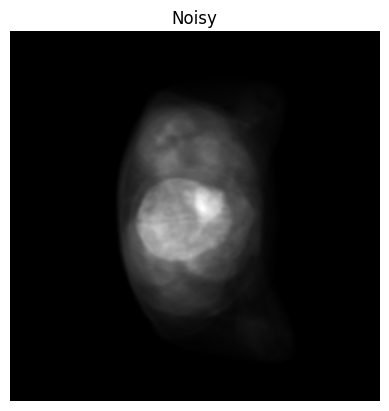

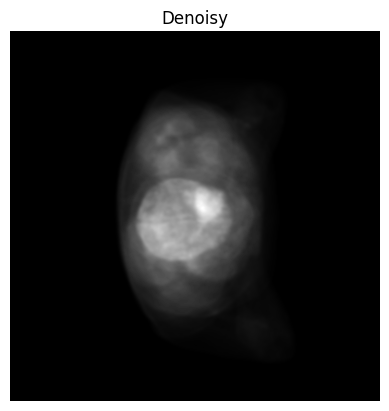

In [30]:
file_to_review= "Anonymous_44.nii.gz"
process_file("./data/test/"+file_to_review ,"/Users/randyllpandohie/Library/CloudStorage/OneDrive-UniversityofCentralFlorida/Data/Grand_competition_pet/"+file_to_review )

PCA code used for categorization

In [49]:
import os
import nibabel as nib
import numpy as np
from sklearn.decomposition import PCA
from skimage.transform import resize
from sklearn.cluster import KMeans

# Function to load NIfTI images and return them as arrays
def load_nifti_files(directory, target_shape):
    nifti_images = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith('.nii.gz'):
                file_path = os.path.join(root, file)
                nifti_image = nib.load(file_path)
                nifti_data = nifti_image.get_fdata()
                # Resize to a common shape
                nifti_data = resize(nifti_data, target_shape, anti_aliasing=True)
                nifti_images.append(nifti_data)
    return nifti_images

# Main program for clustering
if __name__ == '__main__':
    nifti_directory = './data/test/'  # Directory containing your NIfTI files

    # Define a common target shape
    target_shape = (256, 256, 256)  # Adjust to the desired common shape

    # Load NIfTI images as arrays with the same shape
    nifti_data = load_nifti_files(nifti_directory, target_shape)

    # Flatten the data for PCA
    flat_data = [img.flatten() for img in nifti_data]
    flat_data = np.array(flat_data)

    # Number of clusters for K-means
    num_clusters = 6

    # Apply K-means clustering
    kmeans = KMeans(n_clusters=num_clusters)
    clusters = kmeans.fit_predict(flat_data)
    
    print(clusters)
    # Now, 'clusters' contains the cluster assignments for each NIfTI file
    # You can further analyze and visualize the clusters as needed



/Users/randyllpandohie/miniconda3/envs/my-torch/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 2 1 5 1 0 0 0 3 0 1 0 1 1 1 1 0 0 0 0 0 0 4
 4 1 0 1 1 1 0 0 1 1 1 1 0]


In [65]:
import os
import re
import nibabel as nib
import numpy as np
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Function to load NIfTI images and their labels
def load_nifti_data_with_labels(directory):
    nifti_data = []
    labels = []

    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith('.nii.gz'):
                file_path = os.path.join(root, file)
                nifti_image = nib.load(file_path)
                nifti_data.append(nifti_image.get_fdata())

                # Extract the label from the file name using a regular expression
                match = re.search(r'tor_(\d+)', file)
                if match:
                    label = int(match.group(1))
                    labels.append(label)
                else:
                    labels.append(None)

    return nifti_data, labels

# Function to perform PCA on NIfTI data
def perform_pca(nifti_data, num_components):
    # Stack the 3D data into a 2D matrix for PCA
    data_matrix = np.array([nifti.flatten() for nifti in nifti_data])

    # Perform PCA to reduce dimensionality
    pca = PCA(n_components=num_components)
    reduced_data = pca.fit_transform(data_matrix)

    return reduced_data

# Main program for classification
if __name__ == '__main__':
    data_directory = './build/train/'  # Directory containing NIfTI files
    num_pca_components = 5 # Number of PCA components (adjust as needed)

    # Load NIfTI data and labels
    nifti_data, labels = load_nifti_data_with_labels(data_directory)
    print(labels)
    # Perform PCA
    reduced_data = perform_pca(nifti_data, num_pca_components)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(reduced_data, labels, test_size=0.2, random_state=42)

    # Create and train a classifier (e.g., RandomForest) on the training data
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)

    # Predict labels for the testing data
    y_pred = clf.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy * 100:.2f}%')


[20, 50, 10, 4, 100, 2]
Accuracy: 0.00%


In the training of the data all the DICOM files were converted to NIfTI files

In [ ]:
import dicom2nifti
# Specify the path to the DICOM file or directory containing DICOM files
dicom_directory = './data/train/uExplorer17/Anonymous_ANO_20220601_1453091_091227/2.886 x 600 WB NORMAL/'

# Specify the output NIfTI file path
nifti_file = './build/'

# Convert DICOM to NIfTI
dicom2nifti.convert_directory(dicom_directory, nifti_file, compression=True)

In [ ]:
import nibabel as nib
from skimage.metrics import structural_similarity as ssim
import numpy as np

def load_nifti(file_path):
    img = nib.load(file_path)
    return img.get_fdata()

def denoise_nifti(data, hyperparameters):
    # Apply your denoising algorithm with the specified hyperparameters
    # This part depends on the denoising algorithm you are using
    # You may use libraries like scikit-image, PyTorch, TensorFlow, etc.

    # Example (using a no-op denoising function):
    denoised_data = data
    
    return denoised_data


def compare_nifti(original_data, denoised_data, data_range=None):
    # Calculate SSIM between original and denoised data
    ssim_value = ssim(original_data, denoised_data, data_range=data_range)

    return ssim_value

# Paths to your NIfTI files
original_nifti_path = './build/304_2886_x_600_wb_normal.nii.gz'
denoised_nifti_path = './build/305_2886_x_600_wb_d2.nii.gz'

# Load NIfTI files
original_data = load_nifti(original_nifti_path)
denoised_data = load_nifti(denoised_nifti_path)

# Define hyperparameters to test (e.g., noise levels, filter parameters)
hyperparameters_list = [180, 50, 200,250,300]  

best_hyperparameter = None
best_ssim = -1.0  # Initialize with a low value

for hyperparameter in hyperparameters_list:
    # Denoise the data with the current hyperparameter
    denoised_data_current = denoise_nifti(original_data, hyperparameter)

    # Compare the denoised data with the original data using SSIM
    current_ssim = compare_nifti(original_data, denoised_data_current,255)

    # Check if this hyperparameter yielded a better result
    if current_ssim > best_ssim:
        best_ssim = current_ssim
        best_hyperparameter = hyperparameter

print(f"Best Hyperparameter: {best_hyperparameter}")
print(f"Best SSIM: {best_ssim}")
